In [1]:
import matplotlib.pyplot as pl
import numpy as np
from scipy.interpolate import griddata
import scipy.spatial as spat
import os
from matplotlib.lines import Line2D
from scipy.interpolate import interp1d
import matplotlib.ticker as mticker
pl.rcParams.update({'font.size':20})
#pl.rcParams['agg.path.chunksize'] = 1000000

from matplotlib.colors import LogNorm
from scipy.signal import savgol_filter
import scipy.stats as scist

In [2]:
# Path where the ascii files of the snapshots are located.
data_path = '/home/juanmanuel/Documents/Master/Thesis/Simulations/'

In [3]:
# Renzo
#lrtab1,mtab1,htab1,hetab1,lTtab1,lPtab1 = np.genfromtxt('{}PARSEC/star1_RENZO_TAMS_4.15MYR'.format(data_path),
                                                        #dtype='float',usecols=(2,1,6,7,3,5),
                                                        #skip_header=6,comments="#", unpack=True)

lrtab1,mtab1,htab1,hetab1,lTtab1,lPtab1 = np.genfromtxt('{}PARSEC/star1_PARSEC'.format(data_path),
                                                        dtype='float',usecols=(2,1,6,7,3,5),
                                                        skip_header=6,comments="#", unpack=True)


lrtab2,mtab2,htab2,hetab2,lTtab2,lPtab2 = np.genfromtxt('{}PARSEC/star2_PARSEC'.format(data_path),
                                                        dtype='float',usecols=(2,1,6,7,3,5),
                                                        skip_header=6,comments="#", unpack=True)

# 4 Myr
#lrtab2,mtab2,htab2,hetab2,lTtab2,lPtab2 = np.genfromtxt('{}PARSEC/star2_PARSEC_MS_4.0MYR'.format(data_path),
                                                        #dtype='float',usecols=(2,1,6,7,3,5),
                                                        #skip_header=6,comments="#", unpack=True)

In [4]:
router=500.

l0=69599000000.000000
m0=1.9891000000000000E+033
t0=1.8445e-02*86400
p0=11253326797072562.
d0=m0/(l0*l0*l0)
G=6.67259e-8
kb=1.380658e-16
arad=7.5646e-15

In [5]:
tens1=lrtab1*0.+10.
tens2=lrtab2*0.+10.

rtab1=np.power(tens1,lrtab1)
rtab2=np.power(tens2,lrtab2)
Ttab1=np.power(tens1,lTtab1)
Ttab2=np.power(tens2,lTtab2)
Ptab1=np.power(tens1,lPtab1)
Ptab2=np.power(tens2,lPtab2)

rtab1=np.flip(rtab1)
htab1=np.flip(htab1)
hetab1=np.flip(hetab1)

rtab2=np.flip(rtab2)
htab2=np.flip(htab2)
hetab2=np.flip(hetab2)

mtab1=np.flip(mtab1)
mtab2=np.flip(mtab2)

Ttab1=np.flip(Ttab1)
lTtab1=np.flip(lTtab1)

Ptab1=np.flip(Ptab1)
lPtab1=np.flip(lPtab1)

Ttab2=np.flip(Ttab2)
lTtab2=np.flip(lTtab2)

Ptab2=np.flip(Ptab2)
lPtab2=np.flip(lPtab2)

rcore=np.amax(rtab1[hetab1>0.95])

#Only for MESA TAMS
#rcore=np.amax(rtab[hetab>0.5])

mcore=mtab1[len(rtab1[rtab1<rcore])-1]

print(rcore,mcore)

0.9591024720537946 28.053090734215843


In [6]:
rinn=rtab1[rtab1<rcore]
Pinn=Ptab1[rtab1<rcore]
Tinn=Ttab1[rtab1<rcore]
minn=mtab1[rtab1<rcore]
hinn=htab1[rtab1<rcore]
heinn=hetab1[rtab1<rcore]

drout=(100.-rcore)/1300.

rout1=np.linspace(rcore,3.95,20)
rout2=np.logspace(np.log10(3.96),np.log10(6./5.*router),100)
rout=np.concatenate((rout1,rout2),axis=None)

rinterp=np.logspace(np.log10(rcore),np.log10(router),400)
tensint=rinterp*0.+10.

dtab1=mtab1*0.

for i in np.arange(len(rtab1)):
    if(i==0):
        mloc=mtab1[i]
        vloc=4./3.*np.pi*rtab1[i]*rtab1[i]*rtab1[i]
    else:
        mloc=mtab1[i]-mtab1[i-1]
        vloc=4./3.*np.pi*(rtab1[i]*rtab1[i]*rtab1[i]-rtab1[i-1]*rtab1[i-1]*rtab1[i-1])
    dtab1[i]=mloc/vloc
    
dtab2=mtab2*0.

for i in np.arange(len(rtab2)):
    if(i==0):
        mloc=mtab2[i]
        vloc=4./3.*np.pi*rtab2[i]*rtab2[i]*rtab2[i]
    else:
        mloc=mtab2[i]-mtab2[i-1]
        vloc=4./3.*np.pi*(rtab2[i]*rtab2[i]*rtab2[i]-rtab2[i-1]*rtab2[i-1]*rtab2[i-1])
    dtab2[i]=mloc/vloc

In [7]:
dtab1=dtab1*d0
dtab2=dtab2*d0

indz1=np.argmin(dtab1)
dtab1=np.delete(dtab1,indz1)
rtab1=np.delete(rtab1,indz1)
htab1=np.delete(htab1,indz1)
mtab1=np.delete(mtab1,indz1)
hetab1=np.delete(hetab1,indz1)

indz2=np.argmin(dtab2)
dtab2=np.delete(dtab2,indz2)
rtab2=np.delete(rtab2,indz2)
htab2=np.delete(htab2,indz2)
mtab2=np.delete(mtab2,indz2)
hetab2=np.delete(hetab2,indz2)

dinn=dtab1[rtab1<rcore]
denafter=dtab1[len(rtab1[rtab1<rcore])+1]

In [8]:
#l=1606 #Renzo
#l=1464 #Halfres
#l=1221 #4Myr

#l=1269 #b01
#l=1090 #b1
#l=1342 #b3

l=1263 #v10
#l=246 #v100
#l=1247 #v500

lstr='{:04d}'.format(l)
print(lstr)
time='{:.1f}'.format(l/2.*1.8445e-02)
x,y,z,vx,vy,vz,m,d,inten,t = np.genfromtxt("{}v10/out".format(data_path)+lstr+'.sph.ascii',
                                            dtype="float", usecols=(0,1,2,3,4,5,6,7,8,12),
                                            skip_header=12,comments="#", unpack=True)

0246


In [9]:
#artificially scaling
indexpart=np.arange(len(x))
d=d*d0#/d0
t=t/4.

#to be adapted to the number of particles in the primary + 1
x1=x[0:799021]
y1=y[0:799021]
z1=z[0:799021]
m1=m[0:799021]
d1=d[0:799021]

x2=x[799021:]
y2=y[799021:]
z2=z[799021:]
m2=m[799021:]
d2=d[799021:]
p=2./3.*(d/d0)*inten*p0

In [10]:
#read abundances
h1,he1 = np.genfromtxt("{}/v10/init_ab_frac1.dat".format(data_path),
                        dtype="float", usecols=(0,1) ,skip_header=1,comments="#", unpack=True)
h2,he2 = np.genfromtxt("{}/v10/init_ab_frac2.dat".format(data_path),
                        dtype="float", usecols=(0,1) ,skip_header=1,comments="#", unpack=True)
    
h=np.concatenate((h1, h2), axis=None)
he=np.concatenate((he1, he2), axis=None)

In [11]:
#find the center of mass of all the particles that are more massive than 0.1 Msun

xcm = x[np.argmax(d)]
ycm = y[np.argmax(d)]
zcm = z[np.argmax(d)]

vxcm = vx[np.argmax(d)]
vycm = vy[np.argmax(d)]
vzcm = vz[np.argmax(d)]
    
r=np.sqrt((x-xcm)*(x-xcm)+(y-ycm)*(y-ycm)+(z-zcm)*(z-zcm))

r1=r[0:799021]
r2=r[799021:]

xnew=x-xcm
ynew=y-ycm
znew=z-zcm
vxnew=vx-vxcm
vynew=vy-vzcm
vznew=vz-vzcm

flag1=np.zeros(len(r1))
flag2=np.zeros(len(r2))+1.
flag=np.concatenate((flag1,flag2),axis=None)
isbound=np.argsort(r)

isbound=np.argsort(r)
    
xnew=vxnew[isbound]
ynew=vynew[isbound]
znew=vznew[isbound]

vxnew=vxnew[isbound]
vynew=vynew[isbound]
vznew=vznew[isbound]

r=r[isbound]
d=d[isbound]
inten=inten[isbound]
p=p[isbound]
t=t[isbound]
h=h[isbound]
he=he[isbound]
m=m[isbound]


flag=flag[isbound]
v2=(vxnew)*(vxnew)+(vynew)*(vynew)+(vznew)*(vznew)
mintern=np.cumsum(m)

In [12]:
np.place(mintern,mintern<=mcore,mcore)
en=0.5*v2*l0*l0/t0/t0+inten*p0/d0-G*mintern*m0/(r*l0)
bound=np.where(en<0.)[0]

xnew=xnew[bound]
ynew=ynew[bound]
znew=znew[bound]
vxnew=vxnew[bound]
vynew=vynew[bound]
vznew=vznew[bound]
r=r[bound]

m=m[bound]
d=d[bound]
inten=inten[bound]
p=p[bound]
t=t[bound]
h=h[bound]
he=he[bound]
flag=flag[bound]

print('max r', np.amax(r))
print('mbound',np.sum(m))

max r 116.39126664972343
mbound 85.71069088890899


/tmp/ipykernel_12345/1653112337.py:2: RuntimeWarning: divide by zero encountered in true_divide
  en=0.5*v2*l0*l0/t0/t0+inten*p0/d0-G*mintern*m0/(r*l0)


In [13]:
mcpartbou=[]
mrbou=0.
rbou=r
mbou=m
mbousort=[x for _,x in sorted(zip(rbou,mbou))]
rbousort=[x for _,x in sorted(zip(rbou,rbou))]
    
for i in np.arange(len(mbousort)):
    mrbou=mrbou+mbousort[i]
    mcpartbou.append(mrbou)

In [14]:
mcpartbou=np.array(mcpartbou)

rlast=r[r>rcore]
mlast=m[r>rcore]
hlast=h[r>rcore]
helast=he[r>rcore]
flaglast=flag[r>rcore]
dlast=d[r>rcore]
intenlast=inten[r>rcore]
tlast=t[r>rcore]

denref=rout*0.
denbin=denref[0:-1]
Pbin=denbin*0.
Tbin=denbin*0.
mcumbin=denbin*0.
fHbin=denbin*0.
fHebin=denbin*0.
fstar2bin=denbin*0.

dencut=[]
cmasscut=[]
Tcut=[]
Pcut=[]
hcut=[]
hecut=[]
fstar2cut=[]

print('mcore, diciamo... ',np.sum(m[r<=rcore]))
print('check abund envelope')
print('menv = ', np.sum(mlast))
print('mHeenv = ', np.sum(mlast*helast))
print('mHecore = ', np.sum(m[r<=rcore]*he[r<=rcore]))
print('mHenv = ', np.sum(mlast*hlast))
print('mHcore = ', np.sum(m[r<=rcore]*h[r<=rcore]))
print('fHetot = ',np.sum(mlast*helast)/np.sum(mlast))
print('fHtot = ',np.sum(mlast*hlast)/np.sum(mlast))

mcore, diciamo...  30.754045847140304
check abund envelope
menv =  54.95664504176868
mHeenv =  36.34055306784713
mHecore =  22.682102120006174
mHenv =  7.9490333435873115
mHcore =  1.4898241379340296
fHetot =  0.6612585801085061
fHtot =  0.14464189612640674


In [15]:
fHeenvmix=np.sum(mlast*helast)/np.sum(mlast)
mtotal=np.sum(m[r<=rcore])
for i in np.arange(1,len(rout)):
    
    indsum=((rlast<=rout[i]) & (rlast>rout[i-1]))
    mbin=np.sum(mlast[indsum])
    mHbin=np.sum(mlast[indsum]*hlast[indsum])
    mHebin=np.sum(mlast[indsum]*helast[indsum])
    mstar2=np.sum(mlast[indsum]*flaglast[indsum])
    
    fstar2=mstar2/mbin
    volbin=4./3.*np.pi*(rout[i]*rout[i]*rout[i]-rout[i-1]*rout[i-1]*rout[i-1])
    denbin[i-1]=mbin/volbin*d0
    intenbin=np.sum(dlast[indsum]*intenlast[indsum])/np.sum(dlast[indsum])
    Pbin[i-1]=2./3.*mbin/volbin*intenbin*p0
    Tbin[i-1]=np.sum(dlast[indsum]*tlast[indsum])/np.sum(dlast[indsum])
    
    mtotal=mtotal+mbin
    mcumbin[i-1]=mtotal
    fHbin[i-1]=mHbin/np.sum(mlast[indsum])
    fHebin[i-1]=mHebin/np.sum(mlast[indsum])
    fstar2bin[i-1]=fstar2
    
    denbinint=interp1d(rout[0:-1],np.log10(denbin),kind='linear')
    mcumbinint=interp1d(rout[0:-1],mcumbin,kind='linear')
    Tbinint=interp1d(rout[0:-1],np.log10(Tbin),kind='linear')
    Pbinint=interp1d(rout[0:-1],np.log10(Pbin),kind='linear')
    fHbinint=interp1d(rout[0:-1],fHbin,kind='linear')
    fHebinint=interp1d(rout[0:-1],fHebin,kind='linear')
    fstar2binint=interp1d(rout[0:-1],fstar2bin,kind='linear')
    
    denbininterp=np.power(tensint,denbinint(rinterp))
    mcumbininterp=mcumbinint(rinterp)
    Tbininterp=np.power(tensint,Tbinint(rinterp))
    Pbininterp=np.power(tensint,Pbinint(rinterp))
    fHbininterp=fHbinint(rinterp)
    fHebininterp=fHebinint(rinterp)
    fstar2bininterp=fstar2binint(rinterp)

/tmp/ipykernel_12345/3173005.py:24: RuntimeWarning: divide by zero encountered in log10
  denbinint=interp1d(rout[0:-1],np.log10(denbin),kind='linear')
/tmp/ipykernel_12345/3173005.py:26: RuntimeWarning: divide by zero encountered in log10
  Tbinint=interp1d(rout[0:-1],np.log10(Tbin),kind='linear')
/tmp/ipykernel_12345/3173005.py:27: RuntimeWarning: divide by zero encountered in log10
  Pbinint=interp1d(rout[0:-1],np.log10(Pbin),kind='linear')
/tmp/ipykernel_12345/3173005.py:11: RuntimeWarning: invalid value encountered in double_scalars
  fstar2=mstar2/mbin
/tmp/ipykernel_12345/3173005.py:14: RuntimeWarning: invalid value encountered in double_scalars
  intenbin=np.sum(dlast[indsum]*intenlast[indsum])/np.sum(dlast[indsum])
/tmp/ipykernel_12345/3173005.py:16: RuntimeWarning: invalid value encountered in double_scalars
  Tbin[i-1]=np.sum(dlast[indsum]*tlast[indsum])/np.sum(dlast[indsum])
/tmp/ipykernel_12345/3173005.py:20: RuntimeWarning: invalid value encountered in double_scalars
  fH

In [16]:
Hemixint=fHebininterp*0.+fHeenvmix
kernel_size=20
kernel=np.ones(kernel_size)/kernel_size

dav=np.concatenate((dinn,denbininterp),axis=None)
Pav=np.concatenate((Pinn,Pbininterp),axis=None)
Tav=np.concatenate((Tinn,Tbininterp),axis=None)
mcumav=np.concatenate((minn,mcumbininterp),axis=None)
fHav=np.concatenate((hinn,fHbininterp),axis=None)
fHeav=np.concatenate((heinn,fHebininterp),axis=None)
fHemix=np.concatenate((heinn,Hemixint),axis=None)
fstar2av=np.concatenate((dinn*0.,fstar2bininterp),axis=None)
rav=np.concatenate((rinn,rinterp),axis=None)

dav2=np.convolve(dav,kernel,mode='same')
Pav2=np.convolve(Pav,kernel,mode='same')
Tav2=np.convolve(Tav,kernel,mode='same')
mcumav2=np.convolve(mcumav,kernel,mode='same')

indstart=np.argmin(np.abs(rav-5.e-2))
indend=np.argmin(np.abs(rav-1.e2))

dav=np.concatenate((dav[0:indstart],dav2[indstart:indend],dav[indend:]),axis=None)
Pav=np.concatenate((Pav[0:indstart],Pav2[indstart:indend],Pav[indend:]),axis=None)
Tav=np.concatenate((Tav[0:indstart],Tav2[indstart:indend],Tav[indend:]),axis=None)
mcumav=np.concatenate((mcumav[0:indstart],mcumav2[indstart:indend],mcumav[indend:]),axis=None)

In [17]:
gasp = 5./3.*d*inten*p0
radp = arad*t*t*t*t/3.

ptot=gasp+radp

A = ptot/(np.power(d,5./3.))

In [18]:
from mpl_toolkits.axes_grid1.inset_locator import inset_axes

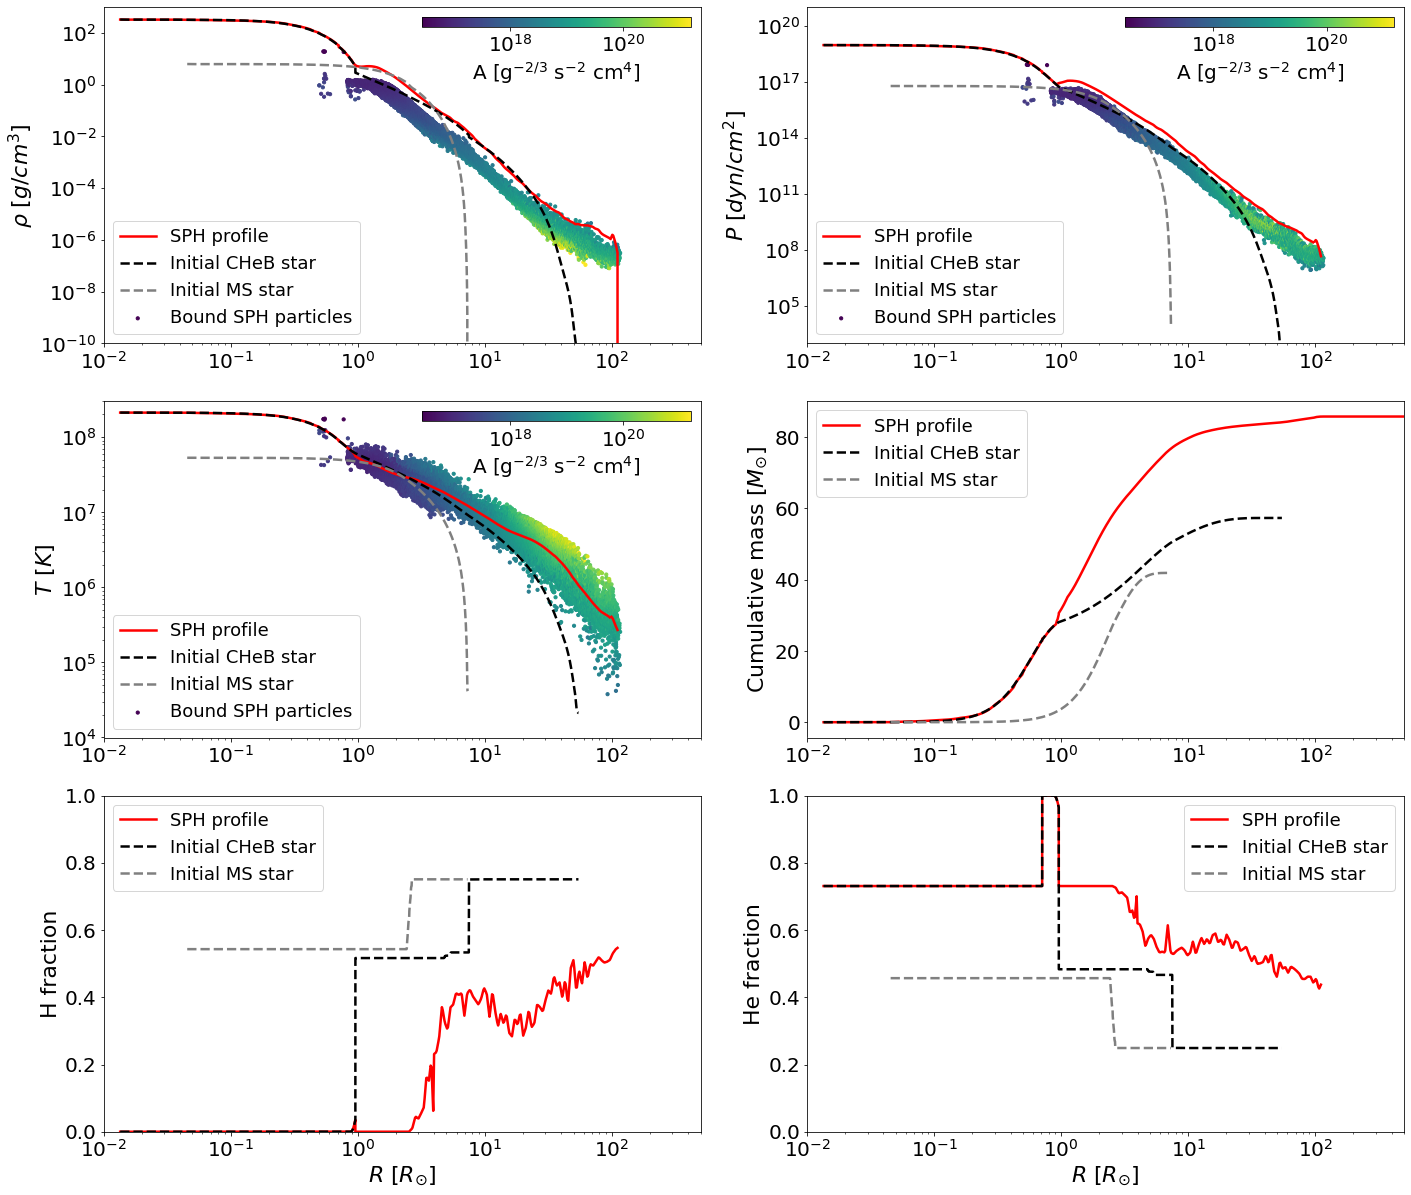

In [19]:
fig, axs = pl.subplots(nrows=3,  ncols=2, figsize=(20,17))
fig.subplots_adjust(hspace=0.3)

#cm = pl.cm.get_cmap('RdYlBu_r')
cm = pl.cm.get_cmap('viridis')

axs[0,0].plot(rav,dav,'r',linewidth=2.5, label='SPH profile')
axs[0,0].plot(rtab1,dtab1,'--k',linewidth=2.5,# label='Initial TAMS star')
              label='Initial CHeB star')
axs[0,0].plot(rtab2,dtab2,color='grey', linestyle='--', linewidth=2.5,# label='Initial MS + 2 Myr star')
              label='Initial MS star')
pcm=axs[0,0].scatter(r,d,s=10,c=A,cmap=cm,norm=LogNorm(), label='Bound SPH particles')
axs[0,0].set_ylabel(r'$\rho$ [$g/cm^3$]', fontsize = 22)
axs[0,0].legend(fontsize = 18, loc=0)
axs[0,0].set_ylim(1.e-10,1000.)
axs[0,0].set_xlim(1.e-2,500.)
#axs[0,0].set_ylim(1.e-10,500.)
#axs[0,0].set_xlim(4.e-2,20.)
axs[0,0].set_yscale('log')
axs[0,0].set_xscale('log')

axs[0,1].plot(rav,Pav,'r',linewidth=2.5, label='SPH profile' )
axs[0,1].plot(rtab1,Ptab1[0:-1],'--k',linewidth=2.5,#label='Initial TAMS star')
              label='Initial CHeB star')
axs[0,1].plot(rtab2,Ptab2[0:-1],color='grey',linestyle='--',linewidth=2.5,#label='Initial MS + 2 Myr star')
              label='Initial MS star')
pcm2=axs[0,1].scatter(r,p,s=10,c=A,cmap=cm,norm=LogNorm(), label='Bound SPH particles')
axs[0,1].legend(fontsize = 18, loc=0)
axs[0,1].set_xscale('log')
axs[0,1].set_yscale('log')
axs[0,1].set_xlim(1.e-2,500.)
#axs[0,1].set_xlim(4.e-2,20.)
axs[0,1].set_ylim(1.e3,1.e21)
axs[0,1].set_ylabel(r'$P$ [$dyn/cm^2$]',fontsize=22)

axs[1,0].plot(rav,Tav,'r',linewidth=2.5, label='SPH profile')
axs[1,0].plot(rtab1,Ttab1[0:-1],'--k',linewidth=2.5,# label='Initial TAMS star')
              label='Initial CHeB star')
axs[1,0].plot(rtab2,Ttab2[0:-1],color='grey',linestyle='--',linewidth=2.5,#label='Initial MS + 2 Myr star')
              label='Initial MS star')
pcm3=axs[1,0].scatter(r,t,s=10,c=A,cmap=cm,norm=LogNorm(), label='Bound SPH particles')
axs[1,0].legend(fontsize = 18, loc=0)
axs[1,0].set_xscale('log')
axs[1,0].set_yscale('log')
axs[1,0].set_xlim(1.e-2,500.)
axs[1,0].set_ylim(1.e4,3.e8)
#axs[1,0].set_xlim(4.e-2,20.)
axs[1,0].set_ylabel(r'$T$ [$K$]',fontsize=22)

axs[1,1].plot(rav,mcumav,'r',linewidth=2.5, label='SPH profile')
axs[1,1].plot(rtab1,mtab1,'--k',linewidth=2.5, #label='Initial TAMS star')
              label='Initial CHeB star')
axs[1,1].plot(rtab2,mtab2,color='grey',linestyle='--',linewidth=2.5,#label='Initial MS + 2 Myr star')
              label='Initial MS star')
axs[1,1].legend(fontsize = 18, loc=0)
axs[1,1].set_xscale('log')
axs[1,1].set_xlim(1.e-2,500.)
#axs[1,1].set_xlim(4.e-2,20.)
axs[1,1].set_ylabel(r'Cumulative mass [$M_{\odot}}$]',fontsize=22)

axs[2,0].plot(rav,fHav,'r',linewidth=2.5,label='SPH profile' )
axs[2,0].plot(rtab1,htab1,'--k',linewidth=2.5,# label='Initial TAMS star')
              label='Initial CHeB star')
axs[2,0].plot(rtab2,htab2,color='grey',linestyle='--',linewidth=2.5,#label='Initial MS + 2 Myr star')
              label='Initial MS star')
#axs[2,0].scatter(r,h,s=1,c='grey', label='bound SPH particles')
axs[2,0].set_ylim(0.,1.)
axs[2,0].set_xlim(1.e-2,500.)
#axs[2,0].set_xlim(4.e-2,20.)
axs[2,0].legend(fontsize=18,loc=0)
axs[2,0].set_xscale('log')
axs[2,0].set_ylabel('H fraction',fontsize=22)
axs[2,0].set_xlabel('$R$ [$R_{\odot}}$]',fontsize=22)
    
axs[2,1].plot(rav,fHeav,'r',linewidth=2.5,label='SPH profile' )
axs[2,1].plot(rtab1,hetab1,'--k',linewidth=2.5,# label='Initial TAMS star')
              label='Initial CHeB star')
axs[2,1].plot(rtab2,hetab2,color='grey',linestyle='--',linewidth=2.5,#label='Initial MS + 2 Myr star')
              label='Initial MS star')
#axs[2,1].scatter(r,he,s=1,c='grey', label='bound SPH particles')
axs[2,1].set_ylim(0.,1.)
axs[2,1].legend(fontsize=18,loc=0)
axs[2,1].set_xlim(1.e-2,500.)
#axs[2,1].set_xlim(4.e-2,20.)
axs[2,1].set_xscale('log')
axs[2,1].set_ylabel('He fraction',fontsize=22)
axs[2,1].set_xlabel('$R$ [$R_{\odot}}$]',fontsize=22)

fig.tight_layout()

cbaxes = inset_axes(axs[0,0], width="45%", height="3%", loc='upper right')#,borderpad=1.)
cbaxes2 = inset_axes(axs[0,1], width="45%", height="3%", loc='upper right')#,borderpad=1.) 
cbaxes3 = inset_axes(axs[1,0], width="45%", height="3%", loc='upper right')#,borderpad=1.) 

pl.colorbar(pcm, cax=cbaxes, label=r'A [g$^{-2/3}$ s$^{-2}$ cm$^{4}$]', orientation='horizontal')
pl.colorbar(pcm2, cax=cbaxes2, label=r'A [g$^{-2/3}$ s$^{-2}$ cm$^{4}$]', orientation='horizontal')
pl.colorbar(pcm3, cax=cbaxes3, label=r'A [g$^{-2/3}$ s$^{-2}$ cm$^{4}$]', orientation='horizontal')

pl.show()